# Overview
Many systems of interest involve exceedingly many particles.  For example, the diffusion of perfume particles involves the complicated motion of a number of particles on the order of Avogadro's number.  The mere thought of using Newton's laws to model the motion of all of these particles is unthinkable.  (your computer probably doesn't even have enough memory to store the locations of that many particles)  However, we can gain much insight into systems like these by modeling the motion of the particles using a random walk.    Topics for today include:


1. Random numbers in Python. (bonus: list comprehension)
2. One-dimensional random walks.
3. Self-avoiding walks. (SAWs)


### Random Numbers in Python

Python libraries for generating random numbers are readily available.  Below you will find some examples.


1. <span style="color:red">By adding print statements and observing outputs, determine what each function below does. </span>
2. <span style="color:red">Add a detailed comment to help you for future use. </span>




In [1]:
# Importing necessary functions from numpy.random module
from numpy.random import random, randint, randn, choice

# Generating a random array of length 3 with values between 0 and 1
a = random(3)

# Generating a random 3x4 array with values between 0 and 1
b = random([3, 4])

# Generating 5 random integers between 0 (inclusive) and 10 (exclusive)
c = randint(0, 10, 5)

# Generating an array of 6 random samples from the standard normal distribution
d = randn(6)

# Choosing a random element from the list ["Julia", "Python", "C++"]
e = choice(["Julia", "Python", "C++"])

a, b, c, d, e

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(array([0.89067017, 0.11760014, 0.51426284]),
 array([[0.11870847, 0.74803646, 0.32794642, 0.60088174],
        [0.44179921, 0.88490092, 0.96015997, 0.06812409],
        [0.63450109, 0.69341597, 0.06027228, 0.71911782]]),
 array([6, 0, 4, 8, 9]),
 array([-1.86945293, -1.58348123,  1.49429522, -0.77841816,  0.70664222,
         0.77162779]),
 'Python')

### List Comprehension

As a side note, I want to mention something called list comprehension in Python.  List comprehension combines loops and lists into a single statement, and they turn out to be pretty handy occassionally.  The cell below gives an example:


1. <span style="color:red">Study the code and the output until you understand fully.   </span>
2. <span style="color:red"> Add comments to help you remember.  </span>
3. <span style="color:red"> Use list comprehension to find all numbers $x < 100$ that are multiples of both 3 and 7. (Hint: There are four of them.) </span>

In [4]:
# Importing necessary function from numpy.random module
from numpy.random import random

# Generating an array of 10 random values between 0 and 1
a = random(10)

# Generating a boolean array indicating whether each element of 'a' is less than 0.5
b = [x < 0.5 for x in a]

# Generating a list containing elements from 'a' that are less than 0.75
c = [x for x in a if x < 0.75]

# Generating a list containing elements from 'a' that are greater than 0.25 and less than 0.75
d = [x for x in a if x < 0.75 and x > 0.25]

# Generating a list where elements from 'a' that are greater than 0.25 and less than 0.75 are retained,
# and other elements are replaced with 0
e = [x if x < 0.75 and x > 0.25 else 0 for x in a]

f = [x for x in range(1, 101) if x / 3 == x // 3 and x / 7 == x // 7]

a, b, c, d, e, f

(array([0.27414054, 0.9131205 , 0.58009954, 0.40255567, 0.29604423,
        0.34428046, 0.64290666, 0.26001525, 0.21816635, 0.19041982]),
 [True, False, False, True, True, True, False, True, True, True],
 [0.27414054036993607,
  0.5800995401440439,
  0.4025556739443972,
  0.2960442255138732,
  0.3442804637763204,
  0.6429066570375649,
  0.26001525303198914,
  0.2181663472532569,
  0.1904198167084149],
 [0.27414054036993607,
  0.5800995401440439,
  0.4025556739443972,
  0.2960442255138732,
  0.3442804637763204,
  0.6429066570375649,
  0.26001525303198914],
 [0.27414054036993607,
  0,
  0.5800995401440439,
  0.4025556739443972,
  0.2960442255138732,
  0.3442804637763204,
  0.6429066570375649,
  0.26001525303198914,
  0,
  0],
 [21, 42, 63, 84])

## Random Walks

Let's start simple and consider a one-dimensional random walk. We'll assume that the length of each step is fixed at 1 and the only thing random about the walk is the direction. (right or left.)   Let's write a code that performs a random walk for 100 steps and see where it ends up.  The code below has two implementations of this algorithm: one rather brute-force and not elegant, and the other very succinct and speedy.


1. <span style="color:red">Execute the cell and interpret the output. </span>
2. <span style="color:red"> Study the code until you understand what each line does.  </span>
3. <span style="color:red"> Add comments to help you remember.  </span>



In [5]:
# Importing necessary functions from numpy.random module
from numpy.random import random, choice
# Importing cumsum function from numpy module
from numpy import cumsum

# Method 1: Using a loop to simulate a random walk
myWalker = [0]  # Starting position of the walker
for i in range(100):  # Simulate 100 steps
    a = random()  # Generate a random number between 0 and 1
    if a < 0.5:  # If the random number is less than 0.5
        myWalker.append(myWalker[-1] + 1)  # Move the walker one step to the right
    else:  # If the random number is greater than or equal to 0.5
        myWalker.append(myWalker[-1] - 1)  # Move the walker one step to the left

# Method 2: Using cumsum and choice functions to simulate a random walk
# Generate an array of 100 random choices of -1 or 1 and calculate the cumulative sum
walker = cumsum(choice([-1, 1], 100))

# Printing the final positions of the walkers from both methods
print(walker[-1])  # Print the final position of the walker from Method 2
print(myWalker[-1])  # Print the final position of the walker from Method 1

20
12


The code above performed **a single** random walk.  To get any meaningful results, we should perform **many** random walks and average over them all.  

1. <span style="color:red"> Using the code above as a starting point, write a code that performs 500 random walks in one-dimension.  </span>
2. <span style="color:red"> Compute the mean square displacemnt $\langle x^2\rangle$ over all walkers (numpy arrays will be your friend) and re-create figure 7.3 b. You should notice that the relationship between  $\langle x^2\rangle$ and number of steps is **linear**, which is not what would happen if the particle diffused at constant speed.</span>
3. <span style="color:red"> Modify your code so that the probability of a right step is not equal to the probability of a left step.  This is called a biased random walk.  Do your results make sense?  </span>





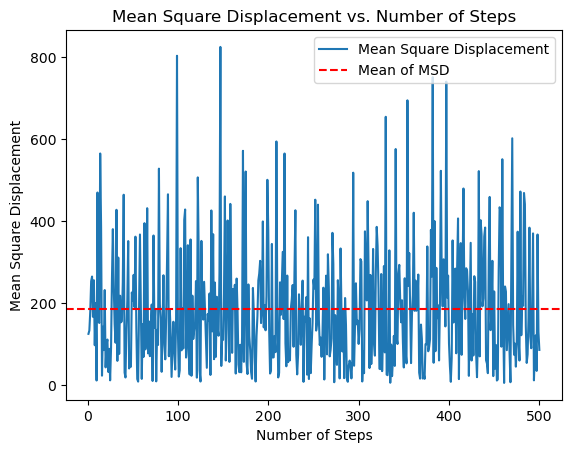

Mean of Mean Square Displacements: 184.8824


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps in each random walk
n_steps = 100

# Number of random walks
n_walks = 500

# Empty list to store mean square displacements
mean_square_displacements = []

# Perform 500 random walks
for _ in range(n_walks):
    # Generate an array of random choices of -1 or 1 with different probabilities for left and right steps
    # which results in a higher probability of stepping left then right
    steps = np.random.choice([-1, 1], n_steps, p = [0.4, 0.6])
    # Calculate the cumulative sum of steps to get the position at each step
    positions = np.cumsum(steps)
    # Calculate the square of the positions and take the mean
    mean_square_displacement = np.mean(positions ** 2)
    # Append the mean square displacement to the list
    mean_square_displacements.append(mean_square_displacement)

# Calculate the mean of mean square displacements over all walks
mean_mean_square_displacement = np.mean(mean_square_displacements)

# Plotting
plt.plot(np.arange(1, n_walks + 1), mean_square_displacements, label = 'Mean Square Displacement')
plt.axhline(mean_mean_square_displacement, color = 'red', linestyle = '--', label = 'Mean of MSD')
plt.xlabel('Number of Steps')
plt.ylabel('Mean Square Displacement')
plt.title('Mean Square Displacement vs. Number of Steps')
plt.legend()
plt.show()

# Print the mean mean square displacement
print("Mean of Mean Square Displacements:", mean_mean_square_displacement)


## Self-avoiding Walks (SAWs)
Random walks have applications in other areas of science as well. One notable example from the field of biology is protein folding. Proteins are composed of long chains of amino acids and each link in the chain can rotate and stretch. This usually creates a protein that is not long and straight, but rather coiled up with many turns and twists.  We can model the shape of a protein using a random walk.  Each step in the walk corrsponds to a new link in the protein.  But there is one complication: **The protein chain can't fold back onto itself.**  This seemingly harmless modification to our random walk turns out to be quite a challenge.  There are two approaches to constructing self-avoiding walks (SAWs):

1. Proceed as we did before, beginning with a 0-length SAW and letting it grow to the desired length.  If you ever encounter a step that causes you to re-visit a previously visited site, you throw the entire random walker out(very important!) and start over again.  This process continues until you have enough SAWs to take averages.  (Some of you will do this for your problem this week)
2. The first method is computationally costly because many you will encounter many invalid walkers and have to throw them out. This wastes computing time and results in a longer loop to achieve desired results.  One way around this problem is to simply simply enumerate **all possible SAWs** of length $n$.  The algorithm that does this is called a depth-first tree search algorithm and it comes up repeatedly in computational science.

Below you will find a code that enumerates **all** possible SAWs of a given length for a two-dimesional square lattice. It's an implementation of the code outlined in example 7.2 in the book.  Although short in length, the code is quite sophisticated.  

1. <span style="color:red"> Execute the code for several lengths and verify that the number of walkers found agrees with table. 7.1 in the book.  </span>
2. <span style="color:red"> By comparing the code below to the pseudo code given in example 7.2, determine what each line of code is doing.</span>
3. <span style="color:red"> Add comments to help you remember in the future.  </span>
4. <span style="color:red"> Plot several walkers to convince yourself that they are all indeed self-avoiding.  </span>





There are 5916 SAWs of length 8. Plotting the 150-th one


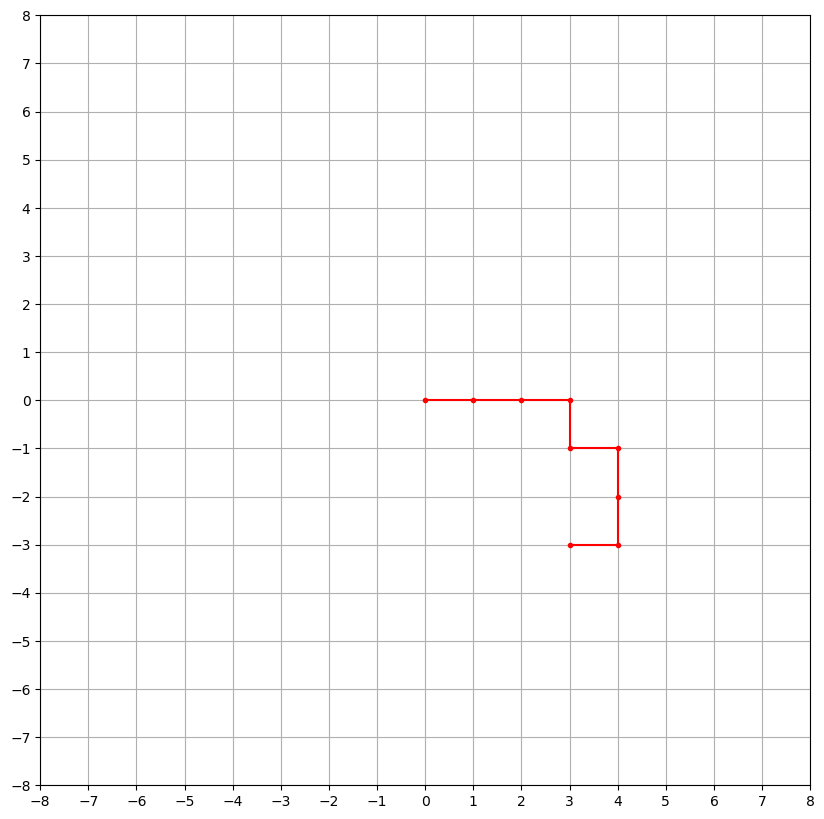

In [12]:
from numpy import zeros, array, ones, any, all, int8, copy
from matplotlib import pyplot as plt

# Define the length of the self-avoiding walk
sawLength = 8
n = sawLength + 1

# List to store all self-avoiding walks
allsaws = []

# Initialize a single self-avoiding walk with zeros
singlesaw = zeros([n, 2])

# Define possible directions (right, left, up, down)
directions = array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Array to store search directions for each step
searchDirections = zeros(n, dtype=int8)

# Array to store visited coordinates
visited = zeros([n, 2])

# Index to keep track of the current step
idx = 0

# Counter to keep track of the number of self-avoiding walks found
sawcount = 0

# Loop to generate self-avoiding walks
while idx > -1:
    if searchDirections[idx] > 3:
        # If all directions have been tried, reset current position
        visited[idx, :] = [0, 0]
        idx -= 1
    else:
        if not any([all(singlesaw[idx, :] + directions[searchDirections[idx], :] == visited[i, :]) for i in range(n)]):
            # If the next step is not visited yet, take the step
            singlesaw[idx + 1, :] = singlesaw[idx, :] + directions[searchDirections[idx], :]
            searchDirections[idx] += 1
            if idx + 1 == sawLength:
                # If the last step is reached, add the walk to the list of all walks
                sawcount += 1
                allsaws.append(copy(singlesaw))
                continue
            else:
                # If not at the end, move to the next step
                idx += 1
                visited[idx, :] = singlesaw[idx, :]
                searchDirections[idx] = 0
        else:
            # If the next step is already visited, try the next direction
            searchDirections[idx] += 1

# Choose which self-avoiding walk to plot
whichSawToPlot = 150

# Print the number of self-avoiding walks and plot the chosen one
print("There are {} SAWs of length {}. Plotting the {}-th one".format(sawcount, sawLength, whichSawToPlot))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot([x[0] for x in allsaws[whichSawToPlot]], [x[1] for x in allsaws[whichSawToPlot]], 'r.-')
ax.set_xlim(-sawLength, sawLength)
ax.set_ylim(-sawLength, sawLength)
ax.set_xticks(range(-sawLength, sawLength + 1, 1))
ax.set_yticks(range(-sawLength, sawLength + 1, 1))
ax.grid()
ax.set_aspect(1)
plt.show()


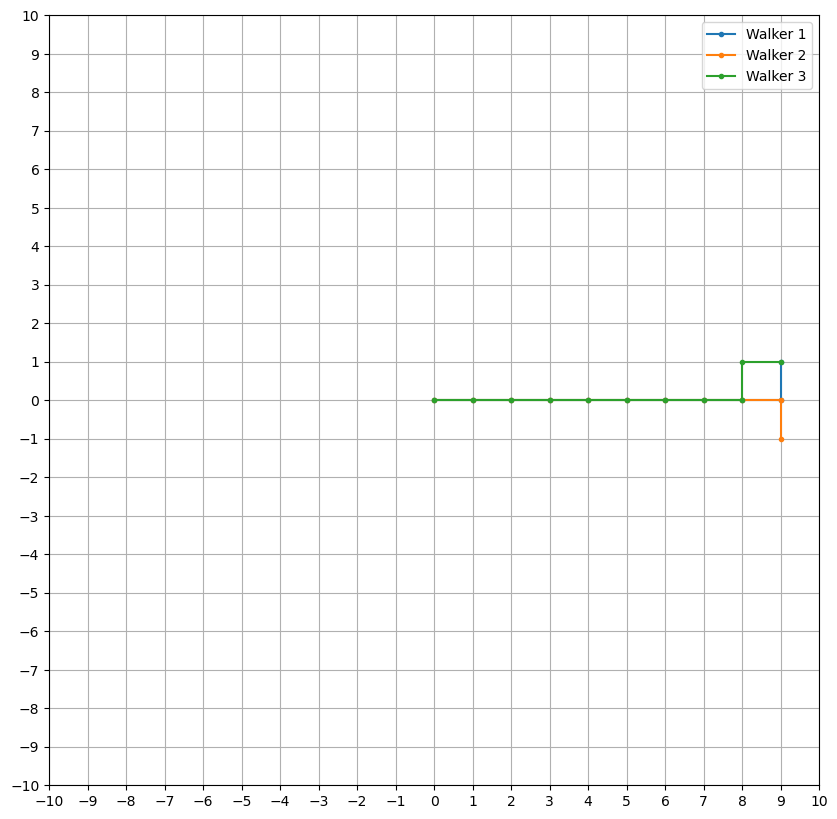

In [15]:
from numpy import zeros, array, ones, any, all, int8, copy
from matplotlib import pyplot as plt

# Define the length of the self-avoiding walk
sawLength = 10
n = sawLength + 1

# List to store all self-avoiding walks
allsaws = []

# Define possible directions (right, left, up, down)
directions = array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Function to generate self-avoiding walks
def generate_walks(num_walks):
    walks = []
    for _ in range(num_walks):
        singlesaw = zeros([n, 2])
        searchDirections = zeros(n, dtype=int8)
        visited = zeros([n, 2])
        idx = 0
        sawcount = 0
        while idx > -1:
            if searchDirections[idx] > 3:
                visited[idx, :] = [0, 0]
                idx -= 1
            else:
                if not any([all(singlesaw[idx, :] + directions[searchDirections[idx], :] == visited[i, :]) for i in range(n)]):
                    singlesaw[idx + 1, :] = singlesaw[idx, :] + directions[searchDirections[idx], :]
                    searchDirections[idx] += 1
                    if idx + 1 == sawLength:
                        sawcount += 1
                        walks.append(copy(singlesaw))
                        continue
                    else:
                        idx += 1
                        visited[idx, :] = singlesaw[idx, :]
                        searchDirections[idx] = 0
                else:
                    searchDirections[idx] += 1
    return walks

# Generate multiple self-avoiding walks
num_walks = 10
allsaws = generate_walks(num_walks)

# Choose which self-avoiding walks to plot
walks_to_plot = [1, 2, 3]  # Indices of the walks to plot

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in walks_to_plot:
    ax.plot([x[0] for x in allsaws[i]], [x[1] for x in allsaws[i]], '.-', label=f'Walker {i}')

ax.set_xlim(-sawLength, sawLength)
ax.set_ylim(-sawLength, sawLength)
ax.set_xticks(range(-sawLength, sawLength + 1, 1))
ax.set_yticks(range(-sawLength, sawLength + 1, 1))
ax.grid()
ax.set_aspect(1)
ax.legend()
plt.show()
